In [1]:
import csv
from pandas import DataFrame
import numpy as np
import pandas as pd
import glob
from os import listdir
import dateutil
from array import *
import random

In [2]:
from fuzzywuzzy import fuzz

C:\Users\taylo\Anaconda3\envs\dsi\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [149]:
>>> import matplotlib.pyplot as plt

In [3]:
#Reads in S1 DF
JeopardyS1 = pd.read_csv(r"C:\Users\taylo\Desktop\GA\DSI_Assignments_NEW\Jeopardy\jeopardy_clues\season1.tsv", sep="\t")

In [4]:
#Confirms S1 DF
JeopardyS1

,round,value,daily_double,category,comments,answer,question,air_date,notes
0,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,1984-09-10,-
1,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,1984-09-10,-
2,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,1984-09-10,-
3,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,1984-09-10,-
4,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,1984-09-10,-
5,1,200,no,INVENTIONS,-,"In 1869 an American minister created this ""ori...",the rickshaw,1984-09-10,-
6,1,300,no,INVENTIONS,-,A 1920's hunting trip to Canada inspired Birds...,freezing,1984-09-10,-
7,1,400,no,INVENTIONS,-,This fastener gets its name from a brand of ga...,a zipper,1984-09-10,-
8,1,100,no,ANIMALS,-,These rodents first got to America by stowing ...,rats,1984-09-10,-
9,1,200,no,ANIMALS,-,"There are about 40,000 muscles & tendons in th...",the trunk,1984-09-10,-


In [5]:
#Creates df for all questions from S1-35
file_name = r"C:\Users\taylo\Desktop\GA\DSI_Assignments_NEW\Jeopardy\jeopardy_clues\season{}.tsv"
Jeopardy1_35 = pd.DataFrame(columns=['round','value','daily_double','category','comments','answer','question', 'air_data', 'notes'])
for i in range(1, 35):
    temp = pd.read_csv(file_name.format(i), sep = "\t", error_bad_lines = False)
    Jeopardy1_35 = Jeopardy1_35.append(temp, sort = False)


In [77]:
#Confirms df created
Jeopardy1_35

,round,value,daily_double,category,comments,answer,question,air_data,notes,air_date
0,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,NaN,-,1984-09-10
1,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,NaN,-,1984-09-10
2,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,NaN,-,1984-09-10
3,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,NaN,-,1984-09-10
4,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,NaN,-,1984-09-10
5,1,200,no,INVENTIONS,-,"In 1869 an American minister created this ""ori...",the rickshaw,NaN,-,1984-09-10
6,1,300,no,INVENTIONS,-,A 1920's hunting trip to Canada inspired Birds...,freezing,NaN,-,1984-09-10
7,1,400,no,INVENTIONS,-,This fastener gets its name from a brand of ga...,a zipper,NaN,-,1984-09-10
8,1,100,no,ANIMALS,-,These rodents first got to America by stowing ...,rats,NaN,-,1984-09-10
9,1,200,no,ANIMALS,-,"There are about 40,000 muscles & tendons in th...",the trunk,NaN,-,1984-09-10


In [7]:
#Confirms ALL seasons in df
Jeopardy1_35.tail()

,round,value,daily_double,category,comments,answer,question,air_data,notes,air_date
12041,2,800,no,FOUND IN TRANSLATION,(Alex: Each correct response will be a word--a...,"A facetious, often bawdy tribute banquet",a roast,NaN,-,2018-07-27
12042,2,1200,no,FOUND IN TRANSLATION,(Alex: Each correct response will be a word--a...,Irregular plural word for multiple layers of s...,strata,NaN,-,2018-07-27
12043,2,1600,no,FOUND IN TRANSLATION,(Alex: Each correct response will be a word--a...,To lean or tilt to one side,list (or slant),NaN,-,2018-07-27
12044,2,2000,no,FOUND IN TRANSLATION,(Alex: Each correct response will be a word--a...,Push the blue button in your GM car to get thi...,OnStar,NaN,-,2018-07-27
12045,3,0,no,AMERICAN HISTORY,-,The last survivor of this battle that started ...,the Battle of Lexington,NaN,-,2018-07-27


In [103]:
#Sees info of df
Jeopardy1_35.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337567 entries, 0 to 12045
Data columns (total 10 columns):
round           337567 non-null object
value           337567 non-null object
daily_double    337567 non-null object
category        337567 non-null object
comments        337567 non-null object
answer          337567 non-null object
question        337567 non-null object
air_data        0 non-null object
notes           337567 non-null object
air_date        337567 non-null object
dtypes: object(10)
memory usage: 28.3+ MB


In [104]:
#Checks out column names
Jeopardy1_35.columns

Index(['round', 'value', 'daily_double', 'category', 'comments', 'answer',
       'question', 'air_data', 'notes', 'air_date'],
      dtype='object')

In [112]:
len(Jeopardy1_35['category'])

337567

In [113]:
len(Jeopardy1_35['category'].unique())

41594

In [111]:
#Prints all unqiue categories
a = Jeopardy1_35['category'].unique()
len(a)

41594

In [11]:
#Gets counts for each uninque category in df
Jeopardy1_35['category'].value_counts()

SCIENCE                              842
LITERATURE                           794
AMERICAN HISTORY                     757
HISTORY                              701
SPORTS                               700
POTPOURRI                            679
BEFORE & AFTER                       656
WORD ORIGINS                         655
WORLD HISTORY                        635
WORLD GEOGRAPHY                      625
BUSINESS & INDUSTRY                  591
U.S. CITIES                          565
TRANSPORTATION                       549
RELIGION                             540
COLLEGES & UNIVERSITIES              539
ART                                  524
WORLD CAPITALS                       508
ANIMALS                              503
U.S. HISTORY                         495
U.S. GEOGRAPHY                       493
BOOKS & AUTHORS                      491
AUTHORS                              489
BODIES OF WATER                      481
STATE CAPITALS                       473
THE BIBLE       

In [12]:
#Gets 20 most popular categories from df
Jeopardy1_35['category'].value_counts().nlargest(20)

SCIENCE                    842
LITERATURE                 794
AMERICAN HISTORY           757
HISTORY                    701
SPORTS                     700
POTPOURRI                  679
BEFORE & AFTER             656
WORD ORIGINS               655
WORLD HISTORY              635
WORLD GEOGRAPHY            625
BUSINESS & INDUSTRY        591
U.S. CITIES                565
TRANSPORTATION             549
RELIGION                   540
COLLEGES & UNIVERSITIES    539
ART                        524
WORLD CAPITALS             508
ANIMALS                    503
U.S. HISTORY               495
U.S. GEOGRAPHY             493
Name: category, dtype: int64

In [130]:
from collections import Counter 

In [137]:
find1s = Jeopardy1_35['category'].value_counts()
find1s

SCIENCE                              842
LITERATURE                           794
AMERICAN HISTORY                     757
HISTORY                              701
SPORTS                               700
POTPOURRI                            679
BEFORE & AFTER                       656
WORD ORIGINS                         655
WORLD HISTORY                        635
WORLD GEOGRAPHY                      625
BUSINESS & INDUSTRY                  591
U.S. CITIES                          565
TRANSPORTATION                       549
RELIGION                             540
COLLEGES & UNIVERSITIES              539
ART                                  524
WORLD CAPITALS                       508
ANIMALS                              503
U.S. HISTORY                         495
U.S. GEOGRAPHY                       493
BOOKS & AUTHORS                      491
AUTHORS                              489
BODIES OF WATER                      481
STATE CAPITALS                       473
THE BIBLE       

In [145]:
x = 1
d = Counter(find1s) 
print('{} has occurred {} times'.format(x, d[x]))

1 has occurred 1558 times


In [146]:
#Sanity check
x = 842
d = Counter(find1s) 
print('{} has occurred {} times'.format(x, d[x]))

842 has occurred 1 times


In [147]:
x = 2
d = Counter(find1s) 
print('{} has occurred {} times'.format(x, d[x]))

2 has occurred 852 times


In [151]:
bins = find1s.value_counts(bins=5)
bins

(0.158, 169.2]    41445
(169.2, 337.4]       92
(337.4, 505.6]       40
(505.6, 673.8]       11
(673.8, 842.0]        6
Name: category, dtype: int64

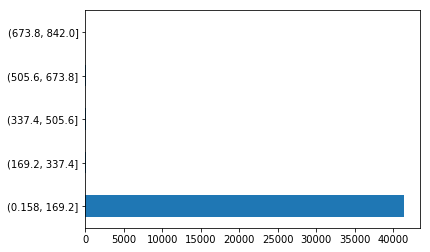

In [152]:
bins.plot(kind='barh')

In [161]:
category_counts = find1s.values
category_counts

array([842, 794, 757, ...,   1,   1,   1], dtype=int64)

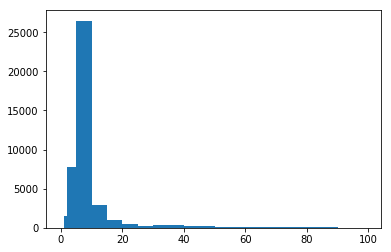

In [171]:
#what i want is the distribution of times that value counts for each category fall from from 1-100, 101-200, 201-300, 
plt.hist(category_counts, bins=[0,1,2,5,10,15,20,25,30,40,50,60,70,80,90,99])
plt.style.use('ggplot')
plt.show()

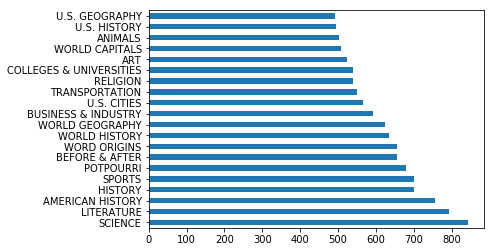

In [150]:
Jeopardy1_35['category'].value_counts()[:20].plot(kind='barh')

In [ ]:
#for category in category list
#search for that category in df1
#create new dataframe from df1 that contains name of category
#continue to create new for every category in category list

In [13]:
Jeopardy1_35.head()

,round,value,daily_double,category,comments,answer,question,air_data,notes,air_date
0,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,NaN,-,1984-09-10
1,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,NaN,-,1984-09-10
2,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,NaN,-,1984-09-10
3,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,NaN,-,1984-09-10
4,1,100,no,INVENTIONS,-,Marconi's wonderful wireless,the radio,NaN,-,1984-09-10


In [14]:
#Sets new df for For Loop to isolate category later
df1 = Jeopardy1_35[['category', 'question', 'answer']]
df1

,category,question,answer
0,LAKES & RIVERS,the Jordan,River mentioned most often in the Bible
1,LAKES & RIVERS,loch,Scottish word for lake
2,LAKES & RIVERS,the Missouri,American river only 33 miles shorter than the ...
3,LAKES & RIVERS,the Caspian Sea,"World's largest lake, nearly 5 times as big as..."
4,INVENTIONS,the radio,Marconi's wonderful wireless
5,INVENTIONS,the rickshaw,"In 1869 an American minister created this ""ori..."
6,INVENTIONS,freezing,A 1920's hunting trip to Canada inspired Birds...
7,INVENTIONS,a zipper,This fastener gets its name from a brand of ga...
8,ANIMALS,rats,These rodents first got to America by stowing ...
9,ANIMALS,the trunk,"There are about 40,000 muscles & tendons in th..."


In [15]:
#Sets list of unique categories
uniquecategories = df1.category.unique()

In [16]:
#Initialzies a dictionary where the key is the unique cateogry and the value is an empty dataframe
categorydf = {elem : pd.DataFrame() for elem in uniquecategories}

In [17]:
#Confirms category df is created
categorydf

{'LAKES & RIVERS': Empty DataFrame
 Columns: []
 Index: [], 'INVENTIONS': Empty DataFrame
 Columns: []
 Index: [], 'ANIMALS': Empty DataFrame
 Columns: []
 Index: [], 'FOREIGN CUISINE': Empty DataFrame
 Columns: []
 Index: [], 'ACTORS & ROLES': Empty DataFrame
 Columns: []
 Index: [], 'THE BIBLE': Empty DataFrame
 Columns: []
 Index: [], "\\'50'S TV": Empty DataFrame
 Columns: []
 Index: [], 'NATIONAL LANDMARKS': Empty DataFrame
 Columns: []
 Index: [], 'NOTORIOUS': Empty DataFrame
 Columns: []
 Index: [], '4-LETTER WORDS': Empty DataFrame
 Columns: []
 Index: [], 'HOLIDAYS': Empty DataFrame
 Columns: []
 Index: [], 'STATE CAPITALS': Empty DataFrame
 Columns: []
 Index: [], "THE '40'S": Empty DataFrame
 Columns: []
 Index: [], 'TRANSPORTATION': Empty DataFrame
 Columns: []
 Index: [], 'COUNTRY MUSIC': Empty DataFrame
 Columns: []
 Index: [], 'BY THE NUMBERS': Empty DataFrame
 Columns: []
 Index: [], 'WILD WEST': Empty DataFrame
 Columns: []
 Index: [], 'OPERA': Empty DataFrame
 Columns

In [18]:
#A for loop that iterates through each category in my dictionary and populates the values with the subset of rows from my master dataframe where the category is my current category
for category in categorydf.keys():
    categorydf[category] = Jeopardy1_35[:][df1.category == category]

In [172]:
#Confirms df created for category
categorydf['SCIENCE']

,round,value,daily_double,category,comments,answer,question,air_data,notes,air_date
304,3,0,no,SCIENCE,-,The mammal that holds the record for the longe...,man,NaN,-,1984-09-20
1017,2,200,no,SCIENCE,-,Fahrenheit equivalent to 0º Centigrade,32,NaN,-,1984-11-28
1018,2,400,no,SCIENCE,-,You might have to put F. Lee Bailey on one to ...,a lie detector,NaN,-,1984-11-28
1019,2,600,no,SCIENCE,-,The science which deals with the motion & beha...,ballistics,NaN,-,1984-11-28
1020,2,800,no,SCIENCE,-,"What you're ""stuck with"" boiling down collagen...",glue,NaN,-,1984-11-28
1021,2,1000,no,SCIENCE,-,"In 1808, this metalsmith made copper plates fo...",Paul Revere,NaN,-,1984-11-28
1037,1,100,no,SCIENCE,-,A sound's repetition by reflection,an echo,NaN,-,1984-11-29
1038,1,200,no,SCIENCE,-,"He originated ""The Origin of Species\""",Charles Darwin,NaN,-,1984-11-29
1039,1,300,no,SCIENCE,-,"Singular form of the word ""bacteria\""",bacterium,NaN,-,1984-11-29
1040,1,400,no,SCIENCE,-,Negative particle that orbits an atom's nucleus,an electron,NaN,-,1984-11-29


In [20]:
#Confirms df created for second category
categorydf['HOMONYMS']

,round,value,daily_double,category,comments,answer,question,air_data,notes,air_date
346,2,200,no,HOMONYMS,(Alex: And for the benefit of our folks at hom...,Hindu hierarchy or a play's actors,a caste (cast),NaN,-,1984-09-21
347,2,400,no,HOMONYMS,(Alex: And for the benefit of our folks at hom...,Near or a purchase,by (buy),NaN,-,1984-09-21
348,2,600,no,HOMONYMS,(Alex: And for the benefit of our folks at hom...,"A fixed look, or Ginger Rogers' partner",a stare (Astaire),NaN,-,1984-09-21
349,2,1000,yes,HOMONYMS,(Alex: And for the benefit of our folks at hom...,Didn't see the fog,missed (mist),NaN,-,1984-09-21
350,2,1000,no,HOMONYMS,(Alex: And for the benefit of our folks at hom...,Where ships dock or what a jury consists of,piers (peers),NaN,-,1984-09-21
395,2,200,no,HOMONYMS,-,"Dave Garroway's sign-off, or a slice of cake",peace (piece),NaN,-,1984-09-24
396,2,400,no,HOMONYMS,-,"What Oliver Twist wanted, or Susan Anton's dim...",more (Moore),NaN,-,1984-09-24
397,2,600,no,HOMONYMS,-,"Olympic swimmer, or what a tobacco chewer does...",Spitz (spits),NaN,-,1984-09-24
398,2,800,no,HOMONYMS,-,"Expensive onion, or what happens when there's ...",leek (leak),NaN,-,1984-09-24
399,2,1000,no,HOMONYMS,-,"A peasant, or where you hang 10",serf (surf),NaN,-,1984-09-24


In [21]:
#Checks information out for random category df
categorydf['NORSE GODS'].info

<bound method DataFrame.info of       round value daily_double    category comments  \
12036     2   400           no  NORSE GODS        -   
12037     2   800           no  NORSE GODS        -   
12038     2  1200           no  NORSE GODS        -   
12039     2  1600           no  NORSE GODS        -   

                                                  answer  \
12036  We can thank Freya, the goddess of love, for t...   
12037  Hermod, whose name means "war spirit", perform...   
12038  Known for his eloquence & knowledge, Bragi was...   
12039  Delling, whose name means "luminous one", was ...   

                                 question air_data notes    air_date  
12036                              Friday      NaN     -  2018-07-27  
12037  delivering messages (or messenger)      NaN     -  2018-07-27  
12038                               poems      NaN     -  2018-07-27  
12039                             sunrise      NaN     -  2018-07-27  >

In [22]:
#Confirms all categories able to be accessed
uniquecategories

array(['LAKES & RIVERS', 'INVENTIONS', 'ANIMALS', ...,
       'CLASSICAL MUSIC TERMS', 'DEFUNCT SPORTS FRANCHISES', 'NORSE GODS'],
      dtype=object)

In [94]:
specific_category = categorydf['GEOGRAPHY']

In [95]:
#gets array of answers for specific category
specific_answers = specific_category.answer.values
specific_answers

array(['Christmas, Easter, or Bermuda, for example',
       'Europe\'s only wild monkeys live on this "rock\\"',
       '1/3 the size of U.S., this royal kingdom has no rivers or lakes but lots of oil',
       'Largest country entirely in Europe',
       'Clocks in Lima, Peru, read the same as in this U.S. time zone',
       'Formerly Formosa',
       'Dutch is still an official language in what is now called Suriname',
       '8th most populous country in the world, this "Bengal Nation" was once East Pakistan',
       'First colony since 1776 to break from Britain without consent, it is now Zimbabwe',
       "About 1/3 of Africa's Pygmy population lives in what was once Belgian Congo",
       "World's longest mountain chain, stretching 4,500 miles across South America",
       '1 of 3 countries with territory on 2 continents',
       'Direction you generally travel in sailing up the Nile',
       '\\"Mexican" region that\' also contains parts of  Guatemala and nearly all of Belize',
 

In [96]:
#turns specific answers array into a list
specific_answers_list = specific_answers.tolist()
specific_answers_list

['Christmas, Easter, or Bermuda, for example',
 'Europe\'s only wild monkeys live on this "rock\\"',
 '1/3 the size of U.S., this royal kingdom has no rivers or lakes but lots of oil',
 'Largest country entirely in Europe',
 'Clocks in Lima, Peru, read the same as in this U.S. time zone',
 'Formerly Formosa',
 'Dutch is still an official language in what is now called Suriname',
 '8th most populous country in the world, this "Bengal Nation" was once East Pakistan',
 'First colony since 1776 to break from Britain without consent, it is now Zimbabwe',
 "About 1/3 of Africa's Pygmy population lives in what was once Belgian Congo",
 "World's longest mountain chain, stretching 4,500 miles across South America",
 '1 of 3 countries with territory on 2 continents',
 'Direction you generally travel in sailing up the Nile',
 '\\"Mexican" region that\' also contains parts of  Guatemala and nearly all of Belize',
 '\\"From the halls of Montezuma to the shores of Tripoli" refer to these 2 countries

In [97]:
#gets aray of questions for specific category
specific_questions = specific_category .question.values
specific_questions

array(['islands', '(rock of) Gibraltar', 'Saudi Arabia', 'France',
       'Eastern', 'Taiwan', 'Dutch Guiana', 'Bangladesh', 'Rhodesia',
       'Zaire', 'the Andes', '(1 of) Turkey, Russia or Egypt', 'South',
       'the Yucatan', 'Mexico & Libya', 'Oahu',
       '(2 of) Yugoslavia, Turkey, Bulgaria, Albania', 'Mt. McKinley',
       'Buda', 'Polynesia', '(2 of) Belgium, The Netherlands, Luxembourg',
       'the United Arab Emirates', 'Winnipeg', 'Wales',
       'Portuguese, English, French & Dutch', 'the Kalahari', 'Sri Lanka',
       'Denmark', 'Transjordan',
       'Venezuela, French Guiana, Guyana, Suriname', 'China', 'Turkey',
       'Mt. Everest', 'Great Barrier Reef', 'Antarctica', 'Greenwich',
       'mountain', 'Sahara', 'the Netherlands', 'Guam',
       '(1 of) Allegheny (or Monongahela)', 'Peru', 'Colorado Springs',
       'New Guinea', 'Pakistan and Afghanistan', 'Tierra del Fuego',
       'the Gulf of Suez and the Gulf of Aqaba', 'Europe',
       'the Arabian Peninsula', 'F

In [98]:
#turns array into list
specific_questions_list = specific_questions.tolist()
specific_questions_list

['islands',
 '(rock of) Gibraltar',
 'Saudi Arabia',
 'France',
 'Eastern',
 'Taiwan',
 'Dutch Guiana',
 'Bangladesh',
 'Rhodesia',
 'Zaire',
 'the Andes',
 '(1 of) Turkey, Russia or Egypt',
 'South',
 'the Yucatan',
 'Mexico & Libya',
 'Oahu',
 '(2 of) Yugoslavia, Turkey, Bulgaria, Albania',
 'Mt. McKinley',
 'Buda',
 'Polynesia',
 '(2 of) Belgium, The Netherlands, Luxembourg',
 'the United Arab Emirates',
 'Winnipeg',
 'Wales',
 'Portuguese, English, French & Dutch',
 'the Kalahari',
 'Sri Lanka',
 'Denmark',
 'Transjordan',
 'Venezuela, French Guiana, Guyana, Suriname',
 'China',
 'Turkey',
 'Mt. Everest',
 'Great Barrier Reef',
 'Antarctica',
 'Greenwich',
 'mountain',
 'Sahara',
 'the Netherlands',
 'Guam',
 '(1 of) Allegheny (or Monongahela)',
 'Peru',
 'Colorado Springs',
 'New Guinea',
 'Pakistan and Afghanistan',
 'Tierra del Fuego',
 'the Gulf of Suez and the Gulf of Aqaba',
 'Europe',
 'the Arabian Peninsula',
 'French Guiana',
 'Macedonia',
 'Pitcairn Island',
 'Rhine',
 'A

In [28]:
#creates variable to get random category
x = random.choice(uniquecategories)
print(x)

GREAT DEPRESSIONS


In [29]:
#accesses random category df
categorydf[x]

,round,value,daily_double,category,comments,answer,question,air_data,notes,air_date
8281,2,400,no,GREAT DEPRESSIONS,-,The Plaine du Cul-de-sac is a 20-mile-long dep...,Haiti,NaN,-,2012-04-16
8282,2,800,no,GREAT DEPRESSIONS,-,"Between the Black Forest & Vosges Mountains, t...",the Rhine River,NaN,-,2012-04-16
8283,2,1800,yes,GREAT DEPRESSIONS,-,"Part of the Great Basin, the Carson Sink is in...",Nevada,NaN,-,2012-04-16
8284,2,1600,no,GREAT DEPRESSIONS,-,"This 900,000-square mile desert on a mideaster...",the Arabian Desert,NaN,-,2012-04-16
8285,2,2000,no,GREAT DEPRESSIONS,-,"This lake in Quebec, Vermont & New York fills ...",(Lake) Champlain,NaN,-,2012-04-16


In [30]:
print(categorydf[x].answer.values)

['The Plaine du Cul-de-sac is a 20-mile-long depression in this French-speaking Caribbean island country'
 'Between the Black Forest & Vosges Mountains, this river flows through a graben, or depression, named for it'
 'Part of the Great Basin, the Carson Sink is in this western U.S. state'
 'This 900,000-square mile desert on a mideastern peninsula has mushy depressions called sabkhas'
 'This lake in Quebec, Vermont & New York fills a broad valley & was once its own sea']


In [31]:
categorydf[x].answer.values

array(['The Plaine du Cul-de-sac is a 20-mile-long depression in this French-speaking Caribbean island country',
       'Between the Black Forest & Vosges Mountains, this river flows through a graben, or depression, named for it',
       'Part of the Great Basin, the Carson Sink is in this western U.S. state',
       'This 900,000-square mile desert on a mideastern peninsula has mushy depressions called sabkhas',
       'This lake in Quebec, Vermont & New York fills a broad valley & was once its own sea'],
      dtype=object)

In [37]:
#creates array from answers for random category
random_answers = categorydf[x].answer.values
random_answers

array(['The Plaine du Cul-de-sac is a 20-mile-long depression in this French-speaking Caribbean island country',
       'Between the Black Forest & Vosges Mountains, this river flows through a graben, or depression, named for it',
       'Part of the Great Basin, the Carson Sink is in this western U.S. state',
       'This 900,000-square mile desert on a mideastern peninsula has mushy depressions called sabkhas',
       'This lake in Quebec, Vermont & New York fills a broad valley & was once its own sea'],
      dtype=object)

In [38]:
#creates list of answers from array of random categories
random_answers_list = random_answers.tolist()
random_answers_list

['The Plaine du Cul-de-sac is a 20-mile-long depression in this French-speaking Caribbean island country',
 'Between the Black Forest & Vosges Mountains, this river flows through a graben, or depression, named for it',
 'Part of the Great Basin, the Carson Sink is in this western U.S. state',
 'This 900,000-square mile desert on a mideastern peninsula has mushy depressions called sabkhas',
 'This lake in Quebec, Vermont & New York fills a broad valley & was once its own sea']

In [39]:
#creates array of questions from random category
random_questions = categorydf[x].question.values
random_questions

array(['Haiti', 'the Rhine River', 'Nevada', 'the Arabian Desert',
       '(Lake) Champlain'], dtype=object)

In [41]:
#creates list of questions from array
random_questions_list = random_questions.tolist()
random_questions_list

['Haiti',
 'the Rhine River',
 'Nevada',
 'the Arabian Desert',
 '(Lake) Champlain']

In [33]:
from random import sample

In [100]:
#gets user input of if they want the quiz to be a random category or specific category
playerchoice = input('Random Category OR Specific Category')
if playerchoice == 'Random Category':
    answers_list = random_answers_list
    questions_list = random_questions_list
else:
    answers_list = specific_answers_list
    questions_list = specific_questions_list

Random Category OR Specific CategorySpecific Category


In [101]:
#sets sample size for quiz questions based on length of list
if len(answers_list) >=5: 
    samplesize = 5
else:
    samplesize = len(answers_list)

In [176]:
#QUIZ! answers_list and questions_list determined by user input Random Category or Specific Category in prior code

Questions = answers_list
             

Answers = questions_list
           

num_right = 0

# Personal taste, I prefer the zipped list of Q & A rather than an index lookup in the for loop
# Ex: key[0] == ('What is the capital of the United States of America? ', 'Washington DC')
# Final note, the zip function returns a generator, so we need to transform it to a list object for sample()
key = zip(Questions, Answers)
key = list(key)

# Sample from key now instead of Questions
s = sample(key, samplesize)

for i in s:
    # in each "i" tuple [0] is the question, [1] is the answer
    print(i[0])
    user_answer = input('Your Guess: ')
    Ratio = fuzz.ratio(user_answer.lower(),i[1].lower())
    Partial_Ratio = fuzz.partial_ratio(user_answer.lower(),i[1].lower())
    Token_Sort_Ratio = fuzz.token_sort_ratio(user_answer,i[1])
    Token_Set_Ratio = fuzz.token_set_ratio(user_answer,i[1])
    if Ratio > 75 or Partial_Ratio > 75 or Token_Sort_Ratio > 75 or Token_Set_Ratio > 75:
        print('Correct')
        num_right += 1
    else:
        print('Not Correct')
# Added a final fraction of correct statement
print('{}/5 Questions Correct'.format(num_right))

It's bordered by the Bristol Channel, Cardigan Bay, the Irish Sea, & England
Your Guess: Whales
Correct
It's the capital & chief seaport of Trinidad & Tobago
Your Guess: Spain of Port
Correct
Known for its wine & cheese, Lombardy is also this country's chief industrial region
Your Guess: Italy
Correct
It's the capital of South Africa's Cape Province
Your Guess: Cape Town
Correct
This Saudi Arabian city on the Red Sea was founded in the 640s as a seaport for Mecca
Your Guess: Jeddah Islamic Port
Correct
5/5 Questions Correct


In [174]:
questions_list

['islands',
 '(rock of) Gibraltar',
 'Saudi Arabia',
 'France',
 'Eastern',
 'Taiwan',
 'Dutch Guiana',
 'Bangladesh',
 'Rhodesia',
 'Zaire',
 'the Andes',
 '(1 of) Turkey, Russia or Egypt',
 'South',
 'the Yucatan',
 'Mexico & Libya',
 'Oahu',
 '(2 of) Yugoslavia, Turkey, Bulgaria, Albania',
 'Mt. McKinley',
 'Buda',
 'Polynesia',
 '(2 of) Belgium, The Netherlands, Luxembourg',
 'the United Arab Emirates',
 'Winnipeg',
 'Wales',
 'Portuguese, English, French & Dutch',
 'the Kalahari',
 'Sri Lanka',
 'Denmark',
 'Transjordan',
 'Venezuela, French Guiana, Guyana, Suriname',
 'China',
 'Turkey',
 'Mt. Everest',
 'Great Barrier Reef',
 'Antarctica',
 'Greenwich',
 'mountain',
 'Sahara',
 'the Netherlands',
 'Guam',
 '(1 of) Allegheny (or Monongahela)',
 'Peru',
 'Colorado Springs',
 'New Guinea',
 'Pakistan and Afghanistan',
 'Tierra del Fuego',
 'the Gulf of Suez and the Gulf of Aqaba',
 'Europe',
 'the Arabian Peninsula',
 'French Guiana',
 'Macedonia',
 'Pitcairn Island',
 'Rhine',
 'A

In [175]:
Str1 = "The supreme court case of Nixon vs The United States"
Str2 = "Nixon v. United States"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
Token_Sort_Ratio = fuzz.token_sort_ratio(Str1,Str2)
Token_Set_Ratio = fuzz.token_set_ratio(Str1,Str2)
print(Ratio)
print(Partial_Ratio)
print(Token_Sort_Ratio)
print(Token_Set_Ratio)
if Ratio > 75 or Partial_Ratio > 75 or Token_Sort_Ratio > 75 or Token_Set_Ratio > 75:
    print('Correct')

57
77
58
95
Correct


In [47]:
print(questions_list)

['a caste (cast)', 'by (buy)', 'a stare (Astaire)', 'missed (mist)', 'piers (peers)', 'peace (piece)', 'more (Moore)', 'Spitz (spits)', 'leek (leak)', 'serf (surf)', 'sucker', 'shark', 'perch', 'file', 'strike', 'queue', 'anchorman', 'fluke', 'Trap', 'Crop', 'Chum', 'Steep', 'Dash', 'aisle/isle', 'wrote/rote', 'change', 'cast', 'scale', 'pile', 'fluke', 'a cruise', 'to flounder', 'a groom', 'stalk', 'a skein']


In [48]:
s

[('To soak in liquid, or marked by an extreme angle', 'Steep'),
 ('If you need a loan, stay away from this non-bony fish; he charges high interest',
  'shark'),
 ("The triangular blade on an anchor's arm, or an accidental stroke of good luck",
  'fluke'),
 ('To throw a fishing net into the water, or the actors in a play', 'cast'),
 ("Hindu hierarchy or a play's actors", 'a caste (cast)')]